In [14]:
#! /usr/bin/python3

from numpy import *

import matplotlib.pyplot as plt # from pylab import plot,show
from matplotlib.pyplot import figure

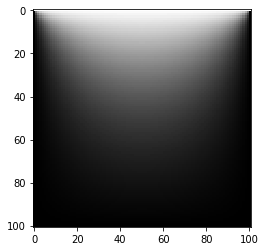

In [9]:
from numpy import empty,zeros,max
from pylab import imshow,gray,show

# Constants
M = 100        # Grid squares on a side
V = 1.0        # Voltage at top wall
target = 1e-6        # Target accuracy

#Create arrays to hold potential values 6
phi= zeros([M+1,M+1] ,float)
phi[0,:] = V
phiprime = empty([M+1,M+1] ,float)

# Main loop
delta = 1.0
while delta>target:
    # Calculate new values of the potential
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4 

    # Calculate maximum difference from old values
    delta = max(abs(phi-phiprime))
    
    # Swap the two arrays around
    phi,phiprime = phiprime,phi
    
# Make a plot
imshow(phi)
gray()
show() 



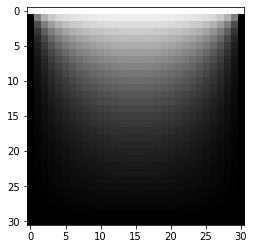

In [5]:
from numpy import empty,zeros,max
from pylab import imshow,gray,show

# Constants
M = 30        # Grid squares on a side
V = 1.0        # Voltage at top wall
target = 1e-6        # Target accuracy

#Create arrays to hold potential values 6
phi= zeros([M+1,M+1] ,float)
phi[0,:] = V
phiprime = empty([M+1,M+1] ,float)

# Main loop
delta = 1.0
while delta>target:
    # Calculate new values of the potential
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4 

    # Calculate maximum difference from old values
    delta = max(abs(phi-phiprime))
    
    # Swap the two arrays around
    phi,phiprime = phiprime,phi
    
# Make a plot
imshow(phi)
gray()
show() 


# 9.2.1 OVERRELAXATION


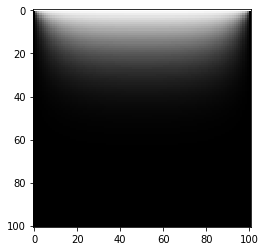

In [15]:
from numpy import empty,zeros,max
from pylab import imshow,gray,show


# Constants
M0 = 100        # Grid squares on a side
V0= 1.0        # Voltage at top wall
target0 = 1e-6        # Target accuracy

#Create arrays to hold potential values 6
phi0= zeros([M0+1,M0+1] ,float)
phi0[0,:] = V0
phiw = empty([M0+1,M0+1] ,float)

# Main loop
delta0 = 1.0
w=-0.3 

while delta0>target0:
    # Calculate new values of the potential
    for i in range(M0+1):
        for j in range(M0+1):
            if i==0 or i==M0 or j==0 or j==M0:
                phiw[i,j] = phi0[i,j]
            else:
                phiw[i,j] = - w*phi0[i,j] + (1+w)*(phi0[i+1,j] + phi0[i-1,j] + phi0[i,j+1] + phi0[i,j-1])/4 
#     print("flag1")
    # Calculate maximum difference from old values
    delta0 = (abs(phi0[1,2]-phiw[1,2]))
    
    # Swap the two arrays around
    phi0,phiw = phiw,phi0
#     print(delta0)
    
# Make a plot
imshow(phi0)
gray()
show() 



# 9.2.2 GAUSS-SEIDEL+OVRLX METHOD


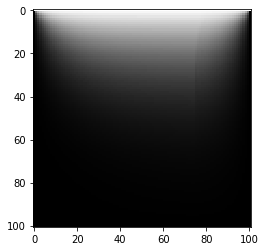

In [16]:
V = 1.0  #0 en los otros 3 lados
a = 0.01  #espaciado del grid 1cm
N = 100 
delta = 1e-6  
w = 0.9

phi = zeros([N + 1, N + 1], float)
phi[0,:] = V


test = 1

while test > delta:
    
    for i in range(N + 1):
        for j in range(N + 1):
            if i==0 or i==N or j==0 or j==N:
                phi[i,j] = phi[i,j]
            else:
                phi0 = phi[i,j]
                phi1 = (1+w)*(phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1]) / 4 - w*phi[i,j]
                phi[i, j] = phi1

    test = abs(phi1 - phi0)


imshow(phi)
gray()
show()

[[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9, 1.0], [1, 1, 1, 1, 1, 1, 1, 1, 37, 85]]


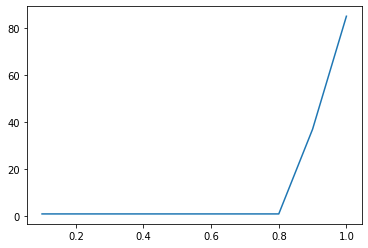

In [17]:
V = 1.0  #0 en los otros 3 lados
N = 100 
delta = 1e-6  
testt=1 
phi = zeros([N + 1, N + 1], float)
phi[0,:] = V

def indexGSovrx(phi, testt, delta,N,w):
    index=0
    while testt > delta:        
        for i in range(N + 1):
            for j in range(N + 1):
                if i==0 or i==N or j==0 or j==N:
                    phi[i,j] = phi[i,j]
                else:
                    phi0 = phi[i,j]
                    phi1 = (1+w)*(phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1]) / 4 - w*phi0
                    phi[i, j] = phi1
        testt = max(abs(phi1 - phi0)) 
        index+=1

    return index

data = []
dataw = []
datai = []
for omega in arange(0.1,1.1,0.1) : 
    i=indexGSovrx(phi, testt, delta,N,omega)
    datai.append(i)
    dataw.append(omega)
    
data.append(dataw)
data.append(datai) 
print(data)
plt.plot(data[0],data[1])
plt.show()

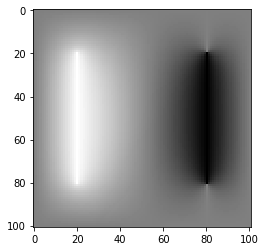

In [18]:
from numpy import zeros
from pylab import imshow, gray, show

V = 1.0  #0 en los otros 3 lados
N = 100 
omegai = 0.9
delta = 1e-6 

phiej = zeros([N + 1, N + 1], float)
phiej[20:81, 20] = V
phiej[20:81, 80] = -V

test = 1

while test > delta:
    
    for i in range(N + 1):
        for j in range(N + 1):
            if i==0 or i==N or j==0 or j==N or (20 <= i <= 80 and j == 20 or j == 80) :
                phiej[i,j] = phiej[i,j]
            else:
                phi0 = phiej[i,j]
                phi1 = (1+omegai)*(phiej[i+1,j] + phiej[i-1,j] + phiej[i,j+1] + phiej[i,j-1]) / 4 - omegai*phi0
                phiej[i, j] = phi1

    test = abs(phi1 - phi0)

    

imshow(phiej)
gray()
show()